# LAB | Hyperparameter Tuning

**Load the data**

Finally step in order to maximize the performance on your Spaceship Titanic model.

The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

So far we've been training and evaluating models with default values for hyperparameters.

Today we will perform the same feature engineering as before, and then compare the best working models you got so far, but now fine tuning it's hyperparameters.

In [1]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
# Check df info (shape, variables, data types)
spaceship.shape
spaceship.dtypes
spaceship.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
# Check for missings
spaceship.isna()   # Boolean DataFrame (True = missing)
spaceship.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [5]:
# If a row has at least one missing value, it is dropped
spaceship = spaceship.dropna()
spaceship.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6606 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   6606 non-null   object 
 1   HomePlanet    6606 non-null   object 
 2   CryoSleep     6606 non-null   object 
 3   Cabin         6606 non-null   object 
 4   Destination   6606 non-null   object 
 5   Age           6606 non-null   float64
 6   VIP           6606 non-null   object 
 7   RoomService   6606 non-null   float64
 8   FoodCourt     6606 non-null   float64
 9   ShoppingMall  6606 non-null   float64
 10  Spa           6606 non-null   float64
 11  VRDeck        6606 non-null   float64
 12  Name          6606 non-null   object 
 13  Transported   6606 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 729.0+ KB


In [6]:
# Extract the first character of the Cabin string
spaceship["Cabin_transformed"] = spaceship["Cabin"].str[0]
spaceship[["Cabin", "Cabin_transformed"]].head()

# Drop useless col
spaceship.drop(columns=["PassengerId", "Name", "Cabin"], inplace=True)
spaceship.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_transformed
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F


In [7]:
spaceship.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6606 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HomePlanet         6606 non-null   object 
 1   CryoSleep          6606 non-null   object 
 2   Destination        6606 non-null   object 
 3   Age                6606 non-null   float64
 4   VIP                6606 non-null   object 
 5   RoomService        6606 non-null   float64
 6   FoodCourt          6606 non-null   float64
 7   ShoppingMall       6606 non-null   float64
 8   Spa                6606 non-null   float64
 9   VRDeck             6606 non-null   float64
 10  Transported        6606 non-null   bool   
 11  Cabin_transformed  6606 non-null   object 
dtypes: bool(1), float64(6), object(5)
memory usage: 625.8+ KB


Now perform the same as before:
- Feature Scaling
- Feature Selection


In [8]:
# FEATURE SCALING ###
# is the process of bringing input features onto a similar numerical range so that no single feature dominates just because it has larger values or magnitude
# ex. Age: 0–80; RoomService: 0–50,000 --> without scaling, RoomService completely overwhelms Age and the model may “ignore” Age.
# Note: Apply scaling only to training data!

# Standardization (z-score scaling): x'= (x - media)/stdev  --> mean = 0; std dev = 1  (works for LogReg, SVM, NN)
# Min-Max scaling: x' = (x - xmin) / (xmax - xmin)  --> sensitive to outliers  (useful for neural networks)
# Robust scaling: uses median and interquartile range (IQR), good for outliers.

# Tree-based ensembles usually don’t need scaling: ex. Decision Trees; Random Forest; Gradient Boosting (XGBoost, LightGBM, CatBoost)
# Decision trees split based on feature thresholds, not distances or magnitudes. Scaling doesn’t change the order of values, so the splits stay the same.

# Ensembles that include non-tree models need scaling:
# Distance- (k-NN, SVM) or gradient-based ensembles (neural nets, linear models) do need scaling:
# ex. Ensembles of SVMs; k-NN-based ensembles; Neural network ensembles; Linear models in boosting (e.g., AdaBoost with linear weak learners); Logistic Regression

               Age  RoomService     FoodCourt  ShoppingMall           Spa  \
count  6606.000000  6606.000000   6606.000000   6606.000000   6606.000000   
mean     28.894036   222.991674    478.958523    178.356494    313.161520   
std      14.533429   644.987936   1678.592291    576.328407   1144.016291   
min       0.000000     0.000000      0.000000      0.000000      0.000000   
25%      19.000000     0.000000      0.000000      0.000000      0.000000   
50%      27.000000     0.000000      0.000000      0.000000      0.000000   
75%      38.000000    49.000000     82.750000     30.000000     65.000000   
max      79.000000  9920.000000  29813.000000  12253.000000  22408.000000   

             VRDeck  
count   6606.000000  
mean     303.780048  
std     1127.142166  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       52.000000  
max    20336.000000  


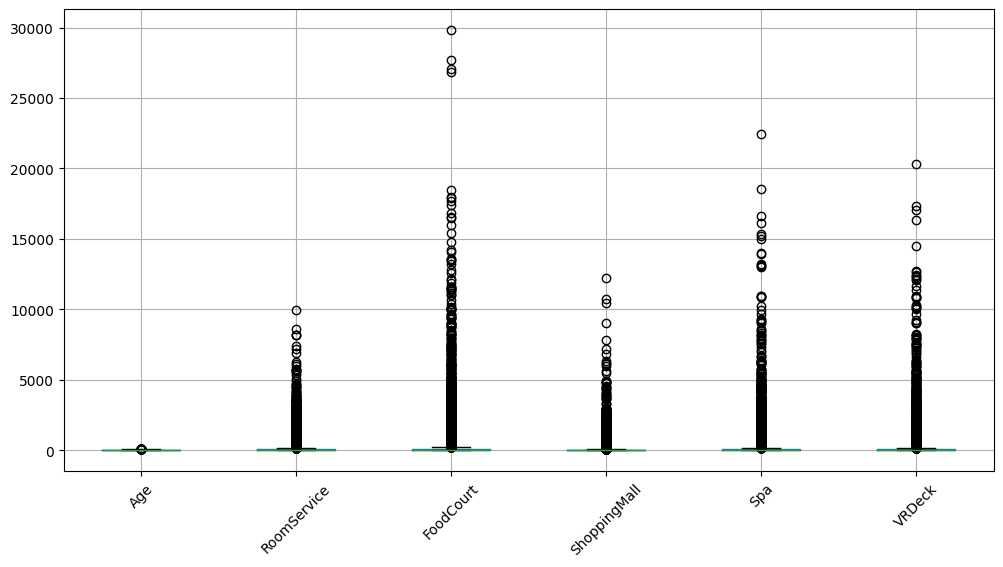

In [9]:
# Inspect descriptive stat of numeric var
X_numeric = spaceship.select_dtypes("number") # df with numeric values
print(X_numeric.describe())
# Min = 0 with huge max: if ranges are huge MinMaxScaler may squash most values near 0
(X_numeric.describe().T.assign(
    range=lambda x: x['max'] - x['min']
).sort_values('range', ascending=False))

# Outlier inspection using IQR
numeric_features = X_numeric.columns # this is an object, a list of col names, not the data

outlier_summary = {}
for col in numeric_features:
    Q1 = X_numeric[col].quantile(0.25)
    Q3 = X_numeric[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = X_numeric[(X_numeric[col] < lower_bound) | (X_numeric[col] > upper_bound)]
    outlier_summary[col] = len(outliers)

outlier_summary

# Inspect outliers (box-plot)
import matplotlib.pyplot as plt

X_numeric.boxplot(figsize=(12,6))
plt.xticks(rotation=45)
plt.show()

In [10]:
# Apply RobustScaler - it is more appropriate when numerical vars have outliers

X_numeric = spaceship.select_dtypes("number")  # original numeric vars
numeric_features = X_numeric.columns

from sklearn.preprocessing import RobustScaler

scaler_robust = RobustScaler()
X_scaled_robust = scaler_robust.fit_transform(X_numeric)

# Convert to DataFrame
df_scaled_robust = pd.DataFrame(
    X_scaled_robust,
    columns=[f"{col}_robust" for col in numeric_features],
    index=spaceship.index
)

print("Stat after RobustScaler:")
print(df_scaled_robust.describe())

Stat after RobustScaler:
        Age_robust  RoomService_robust  FoodCourt_robust  ShoppingMall_robust  \
count  6606.000000         6606.000000       6606.000000          6606.000000   
mean      0.099686            4.550850          5.788018             5.945216   
std       0.764917           13.163019         20.285103            19.210947   
min      -1.421053            0.000000          0.000000             0.000000   
25%      -0.421053            0.000000          0.000000             0.000000   
50%       0.000000            0.000000          0.000000             0.000000   
75%       0.578947            1.000000          1.000000             1.000000   
max       2.736842          202.448980        360.277946           408.433333   

        Spa_robust  VRDeck_robust  
count  6606.000000    6606.000000  
mean      4.817870       5.841924  
std      17.600251      21.675811  
min       0.000000       0.000000  
25%       0.000000       0.000000  
50%       0.000000       0.00

In [11]:
# Select categorical variables
categorical_cols = spaceship.select_dtypes(include=['object']).columns
df_categorical = spaceship[categorical_cols]
df_categorical

# Encode categorical variables
df_encoded = pd.get_dummies(df_categorical, drop_first=True)
df_encoded

,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True,Cabin_transformed_B,Cabin_transformed_C,Cabin_transformed_D,Cabin_transformed_E,Cabin_transformed_F,Cabin_transformed_G,Cabin_transformed_T
0,True,False,False,False,True,False,True,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,True,False,False
2,True,False,False,False,True,True,False,False,False,False,False,False,False
3,True,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,True,False,False,False,False,True,False,False,False,False,False,False,False
8689,False,False,True,True,False,False,False,False,False,False,False,True,False
8690,False,False,False,False,True,False,False,False,False,False,False,True,False
8691,True,False,False,False,False,False,False,False,False,True,False,False,False


In [12]:
df_final = pd.merge(df_scaled_robust, df_encoded, left_index= True, right_index= True)
df_final
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6606 entries, 0 to 8692
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age_robust                 6606 non-null   float64
 1   RoomService_robust         6606 non-null   float64
 2   FoodCourt_robust           6606 non-null   float64
 3   ShoppingMall_robust        6606 non-null   float64
 4   Spa_robust                 6606 non-null   float64
 5   VRDeck_robust              6606 non-null   float64
 6   HomePlanet_Europa          6606 non-null   bool   
 7   HomePlanet_Mars            6606 non-null   bool   
 8   CryoSleep_True             6606 non-null   bool   
 9   Destination_PSO J318.5-22  6606 non-null   bool   
 10  Destination_TRAPPIST-1e    6606 non-null   bool   
 11  VIP_True                   6606 non-null   bool   
 12  Cabin_transformed_B        6606 non-null   bool   
 13  Cabin_transformed_C        6606 non-null   bool   
 1

In [13]:
# Feature selection ####
# is the process of selecting a subset of relevant indep vars as our features and discarding the rest, with goals like:
# reducing overfitting; improving generalization; speeding up training; improving interpretability
# In a single model, this is usually done once before training.

- Now let's use the best model we got so far in order to see how it can improve when we fine tune it's hyperparameters.

In [17]:
# Imports from sklearn.ensemble:
# this is the part of scikit-learn that contains ensemble models — models that combine multiple “weak learners” (usually trees) to make a stronger predictor.
# GradientBoostingClassifier: a specific ensemble model for classification tasks (predicting class labels).
# It builds many decision trees sequentially.
# Each tree tries to correct the errors made by the previous trees.
#  Trees are combined into a weighted sum to make predictions.

# Note: Gradient Boosting model in scikit-learn cannot handle missing values (NaNs)
# Note: Gradient Boosting supports both GradientBoostingClassifier vs GradientBoostingRegressor. Here the outcome var is binary, so we use the Classifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV  # GridSearchCV is a class in scikit-learn that check the best hyperparameters combination
# "CV" stands for Cross-Validation: it evaluates each combination of hyperparameters using cross-validation to get a reliable performance estimate.
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score  # model evaluation
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error  # model evaluation

In [14]:
# Train Test Split
features = df_final  # includes independent vars: scaled numeric & encoded categorical features; does not include the target var "Transported"
y = spaceship.loc[df_final.index, "Transported"]  # reindex y using df_final.index
# After feature engineering, some observations were removed due to missing numeric values.
# Therefore, the target variable was reindexed to match the final feature df before performing the train–test split.

# import the function
from sklearn.model_selection import train_test_split
# split your dataset into two parts:
# Training set → used to train the model
# Test set → used to evaluate how well the model generalizes to new data
X_train, X_test, y_train, y_test = train_test_split(
    features,        # the indep vars
    y,          # the target, dep var
    test_size=0.2,   # 20% test data
    random_state=42, # ensures reproducibility
    stratify=y  # keeps class distribution consistent
)

In [19]:
# Model selection (previous GB model)
# Gradient Boosting achieved the highest accuracy (0.784), suggesting it captures patterns in the data better than the other models.
gb_model_v1 = GradientBoostingClassifier(
    n_estimators=100,        # number of trees
    learning_rate=0.1,       # step size at each iteration
    max_depth=3,             # depth of each tree
    random_state=42
)

# Train the model
gb_model_v1.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb_v1 = gb_model_v1.predict(X_test)

- Evaluate your model (v1)

In [20]:
# evaluate the performance
accuracy_gb_v1 = accuracy_score(y_test, y_pred_gb_v1)
f1_gb_v1 = f1_score(y_test, y_pred_gb_v1, average='weighted')
conf_matrix_gb_v1 = confusion_matrix(y_test, y_pred_gb_v1)
print("\n=== Classification Metrics of model 1 ===")
print("Accuracy:", accuracy_gb_v1)
print("F1-score:", f1_gb_v1)
print("Confusion matrix:\n", conf_matrix_gb_v1)

# Optional: regression-style metrics (only meaningful if y is numeric)
print("\nRegression-style metrics (optional):")
print("R2:", r2_score(y_test, y_pred_gb_v1))
print("MAE:", mean_absolute_error(y_test, y_pred_gb_v1))
print("RMSE:", mean_squared_error(y_test, y_pred_gb_v1))


=== Classification Metrics of model 1 ===
Accuracy: 0.783661119515885
F1-score: 0.782678738191984
Confusion matrix:
 [[471 185]
 [101 565]]

Regression-style metrics (optional):
R2: 0.13459496081447297
MAE: 0.21633888048411498
RMSE: 0.21633888048411498


**Grid/Random Search**

For this lab we will use Grid Search.

- Define hyperparameters to fine tune.

In [21]:
# Define the hyperparameters using a single dict
param_grid = {
    "learning_rate": [0.01, 0.05, 0.1],    # step size at each iteration
    "n_estimators": [50, 100, 200, 500],   # number of trees
    "max_depth": [2, 3, 5],     # depth of each tree
    "subsample": [0.6, 0.8, 1.0]
}

- Run Grid Search

In [ ]:
# Apply Grid Search with cross-validation (GridSearchCV) to tune the hyperparameters of a GradientBoostingClassifier.
# The code creates the GridSearchCV object which knows: which model to use, which hyperparameters to try, how to measure performance, how many folds to use
# the GridSearch is the experiment manager doing the following: for each hyperparameter combination, for each CV fold: train model, evaluate model
# verbose=0 → silent; verbose=1 → prints when each candidate starts; verbose=2 → prints more detail about which fold and which hyperparameter combination is running
gb_model = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42), param_grid = param_grid, scoring="accuracy", cv=5, verbose=2)  

# Train the model
gb_model.fit(X_train, y_train)  # Calling .fit() is the moment the grid search actually runs

# Get best model from GridSearchCV
best_gb_model = gb_model.best_estimator_
print("Best parameters:", gb_model.best_params_)

# Make predictions
y_pred = best_gb_model.predict(X_test)


- Evaluate your model

In [24]:
# Classification metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # works for multi-class
conf_matrix = confusion_matrix(y_test, y_pred)
print("\n=== Classification Metrics of model 2 ===")
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)

# Optional: regression-style metrics (only meaningful if y is numeric)
print("\nRegression-style metrics (optional):")
print("R2:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))


=== Classification Metrics of model 2 ===
Accuracy: 0.789712556732224
F1-score: 0.7890721314915874
Confusion Matrix:
 [[483 173]
 [105 561]]

Regression-style metrics (optional):
R2: 0.15880209477770457
MAE: 0.2102874432677761
RMSE: 0.2102874432677761


- Accuracy:
- Model 1: ≈78%
- Model 2: ≈79% ⬆
➡ Model 2 improves accuracy by (0.7897 − 0.7837)/ 0.7837 = 0.0060  =  0.6%

- F1-score (more reliable than accuracy):
- Model 1: 0.7827
- Model 2: 0.7891 ⬆
➡ Model 2 is better at balancing precision and recall.

- Confusion matrix analysis - false positives:
- Model 1: 185
- Model 2: 173
- Model 2 reduced false positives 

- false negatives:
- Model 1: 101
- Model 2: 105
- Model 2 slightly increases false negatives

- R2
- Model 1: 0.1346
- Model 2: 0.1588
- Model 2 slightly increases R2, consistently with accuracy and f1 increase.
- R² here is computed on class labels, so it’s not a primary metric for classification. 

- MAE /RMSE
- Lower is better → Model 2 is making fewer label mistakes overall.

- Model 2 shows a consistent improvement across accuracy, F1-score, and error-based metrics, indicating better overall classification performance.